---
sidebar_position: 1
---

# Components interactions

In this tutorial, you'll learn how to combine signals and how to perform scalar operations.  

As a reminder, timeseries are often expressed as a [combination of 3 components](https://otexts.com/fpp2/components.html): trend, seasonality and noise. 
If the interaction is **additive** the formula is: $y_t = S_t + T_t + N_t$,  
where $S_t$ is the seasonal component, $T_t$ is the trend-cycle component and $N_t$ is the Noise component, at period $t$.  
Alternatively, if the interaction is **multiplicative**, the relation is: $y_t = S_t * T_t * N_t$. 


The point is: **you add or multiply signal to combine them**.  
To  do so in **mockseries**, just use the standard operators `+`, `-` and `*` !  
This makes it easy to write complex signals mixing **additive** and **multiplicative** interactions, such as:   
$y_t = noise * (flat\_trend + (seasonal\_1 * linear\_trend) + seasonal\_2)$  

## Simple examples
Lets add a linear trend and a sinusoidal signal:  

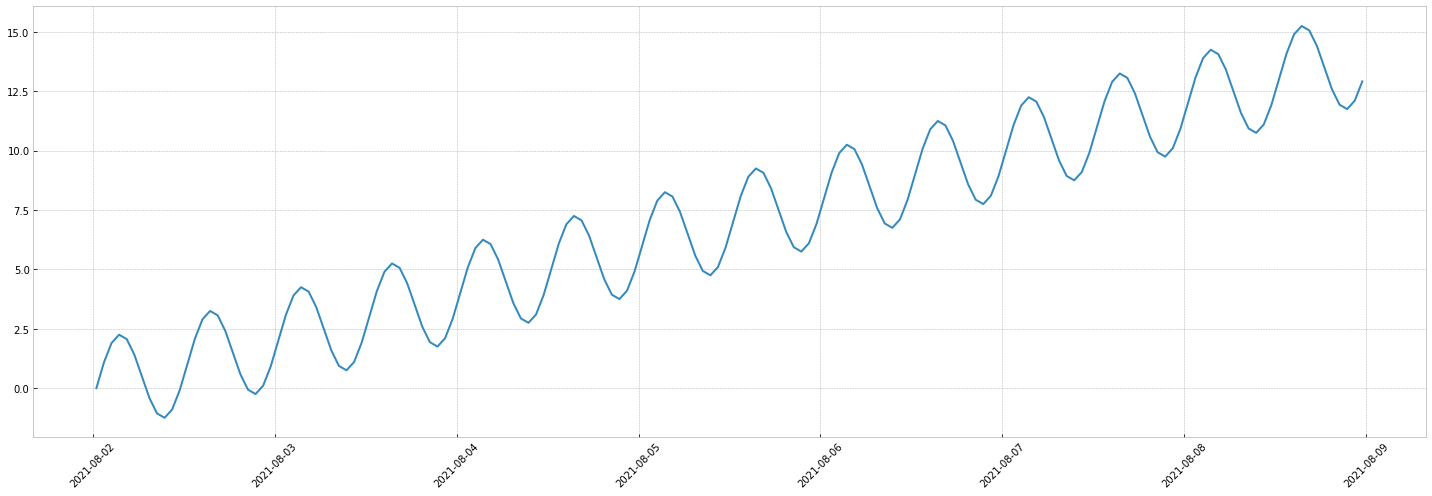

In [1]:
# matplotlib config for whole tutorial
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)

from datetime import timedelta
from mockseries.trend import LinearTrend
from mockseries.seasonality import SinusoidalSeasonality

linear_trend = LinearTrend(coefficient=2, time_unit=timedelta(days=1))
seasonality = SinusoidalSeasonality(amplitude=2, period=timedelta(hours=12))

additive_timeseries = linear_trend + seasonality

# quick preview function !
additive_timeseries.preview_week()

Now if we multiply them:

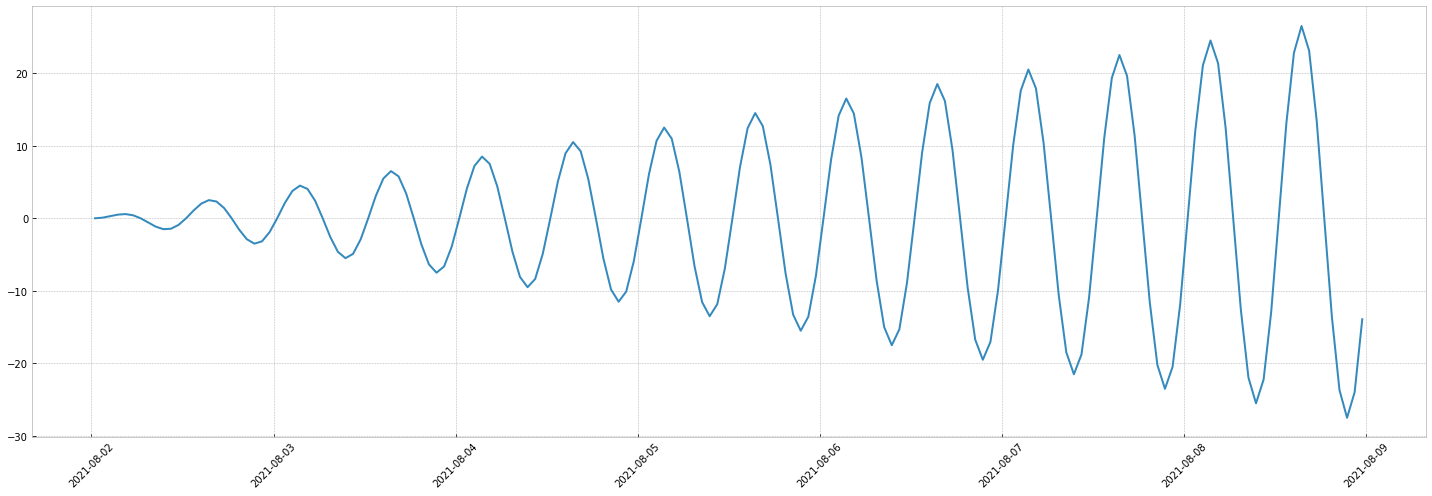

In [2]:
multiplicative_timeseries = linear_trend * seasonality
multiplicative_timeseries.preview_week()

## Complex example
Let's implement the example in the introduction:  
$y_t = noise * (flat\_trend + (seasonal\_1 * linear\_trend) + seasonal\_2)$.  

To give more context, it could represent something like the temperature on Earth:
- the temperature has an average value ($flat\_trend$)
- the temperature is rising $linear\_trend$
- the yearly pattern $seasonal\_1$ is multiplicative with the trend: this means global warming results in bigger yearly patterns
- the daily pattern is additive: it's not impacted by the trend.
- a noise is multiplicative by all of the above: this means it tends to get bigger when temperatures are bigger 

*NB: This model is an un-documented simulation, it is not linked to any research and is obviously incorrect.*  
*NB: For the sake of simplicity, we'll use sinusoidal signals for seasonalities. Check out the next tutorial for more realistic patterns !*

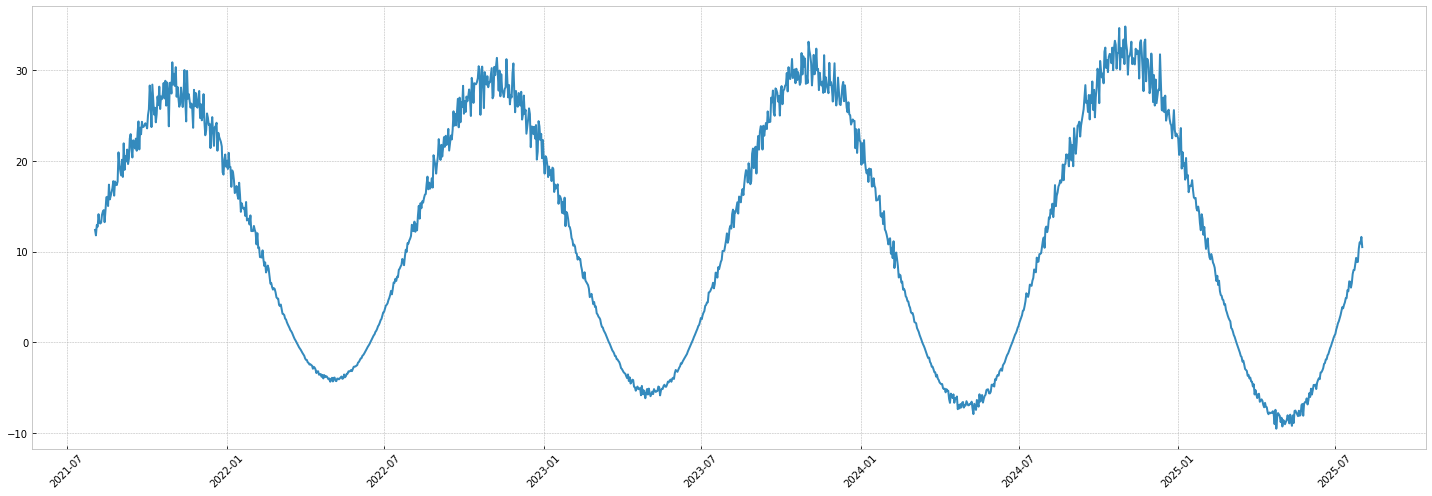

In [3]:
from mockseries.trend import FlatTrend
from mockseries.noise import GaussianNoise

noise = GaussianNoise(mean=1, std=0.05)
average = FlatTrend(12)
warming = LinearTrend(0.1, timedelta(days=365.25), flat_base=1)
yearly_seasonality = SinusoidalSeasonality(amplitude=15, period=timedelta(days=365.25))
daily_seasonality = SinusoidalSeasonality(amplitude=5, period=timedelta(days=1))
temperature = noise * ( average + (warming * yearly_seasonality) + daily_seasonality)

temperature.preview_year(num_years=4)

## Scalars operations:

**mockseries** also support simples scalar operations:
- negate a signal: `-my_signal`
- add a constant to a signal: `3 + my_signal`
- multiply a signal: `3 * my_signal`

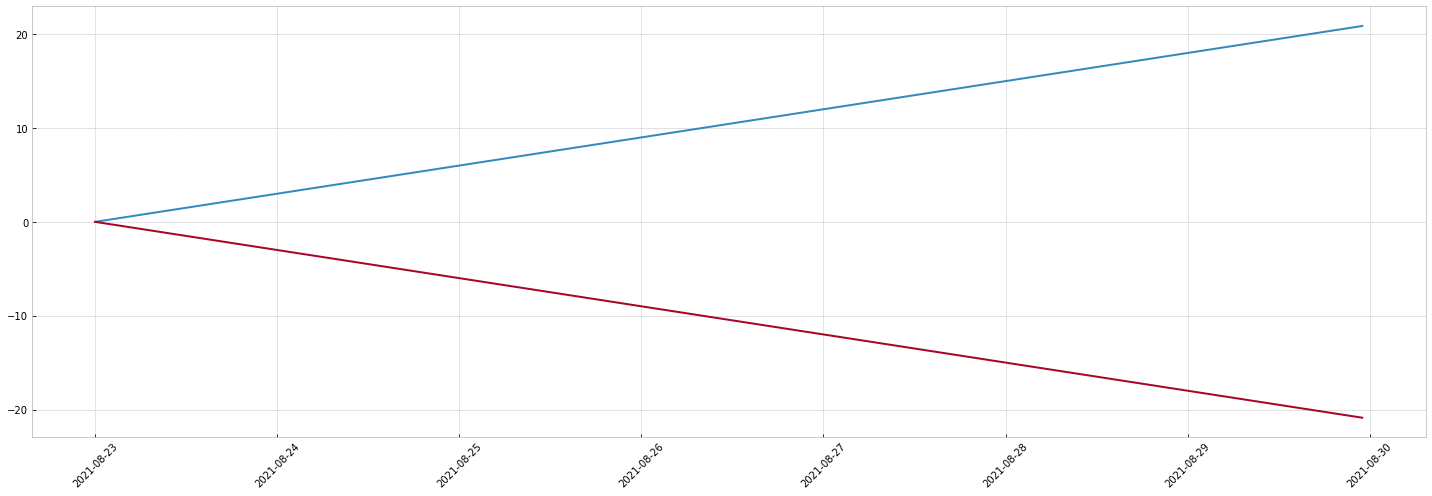

In [4]:
# negate a signal:
from datetime import datetime
from mockseries.utils.dates import datetime_range
from mockseries.utils.plot import plot_timeseries

one_week_index = datetime_range(
    granularity=timedelta(hours=1),
    start_time=datetime(2021, 8, 23),
    end_time=datetime(2021, 8, 23) + timedelta(days=7),
)

trend = LinearTrend(coefficient=3, time_unit=timedelta(days=1))
negated_trend = -trend

plot_timeseries(
    one_week_index,
    [trend.generate(one_week_index), negated_trend.generate(one_week_index)]
)


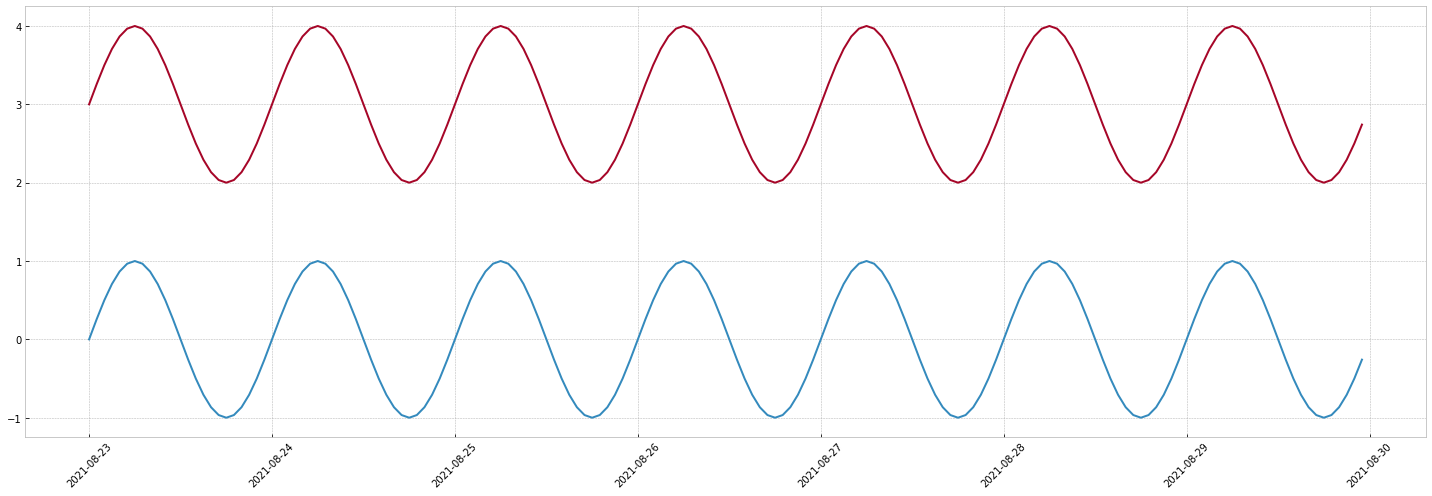

In [5]:
# scalar addition
sinusoid = SinusoidalSeasonality(1, timedelta(days=1))
addition_to_sinusoid = 3 + sinusoid

plot_timeseries(
    one_week_index,
    [sinusoid.generate(one_week_index),addition_to_sinusoid.generate(one_week_index)]
)

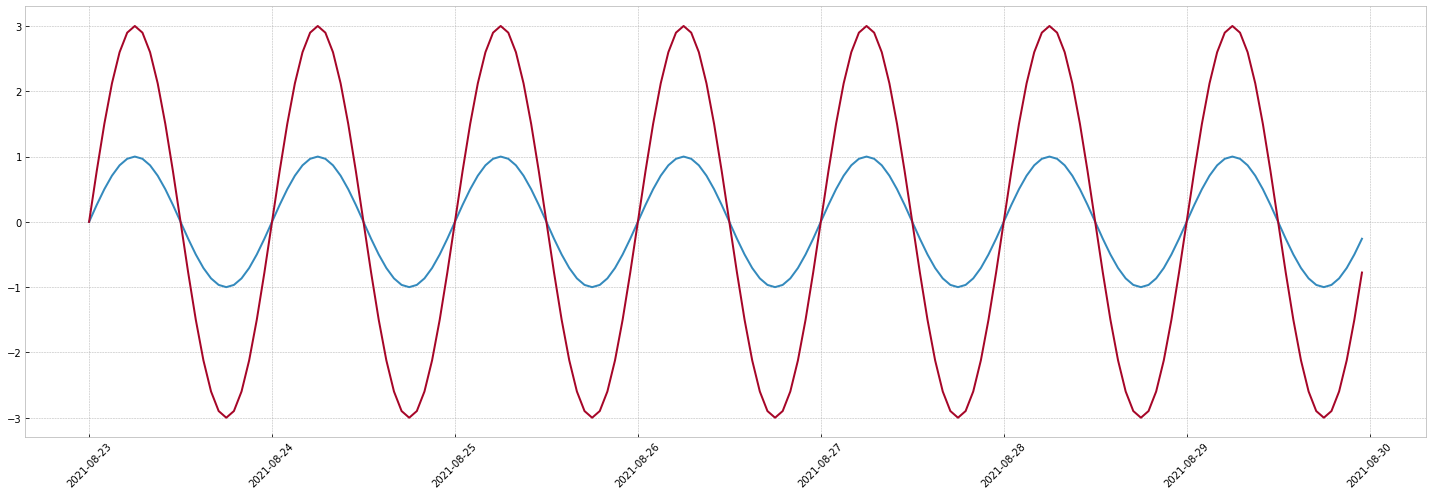

In [6]:
# scalar multiplication
sinusoid = SinusoidalSeasonality(1, timedelta(days=1))
multiplication_to_sinusoid = 3 * sinusoid


plot_timeseries(
    one_week_index,
    [sinusoid.generate(one_week_index),multiplication_to_sinusoid.generate(one_week_index)]
)

You're now are able to combine timeseries and use scalar broadcasting.   
You should be able to build all kinds of timeseries with this simple primitives.  

Go to the next page to learn how to create periodic signals based on `(time, value)` constraints. This is helpful when you simulate real life timeseries.
